In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import zipfile as zf
import re

# Users of Languages Over Time

In [3]:
archive = zf.ZipFile('../data/StackOverflowSurvey2023.zip')
file = archive.open('survey.csv')
df_2023 = pd.read_csv(file)
archive = zf.ZipFile('../data/StackOverflowSurvey2022.zip')
file = archive.open('survey.csv')
df_2022 = pd.read_csv(file)
archive = zf.ZipFile('../data/StackOverflowSurvey2021.zip')
file = archive.open('survey.csv')
df_2021 = pd.read_csv(file)
archive = zf.ZipFile('../data/StackOverflowSurvey2020.zip')
file = archive.open('survey.csv')
df_2020 = pd.read_csv(file)
archive = zf.ZipFile('../data/StackOverflowSurvey2019.zip')
file = archive.open('survey.csv')
df_2019 = pd.read_csv(file)

In [4]:
def remove_all(list, item): 
    count = list.count(item) 
    for i in range(count): 
        list.remove(item) 
    return list 

In [5]:
def count_langs(dataframe, column):
    langs = []
    responses = remove_all(dataframe[column].to_list(), np.nan)
    for response in responses:
        temp_langs = re.findall("[^;]+", response)
        for lang in temp_langs:
            if not lang in langs:
                langs.append(lang)
    
    counts = [0] * (len(langs))
    for response in responses:
        temp_langs = re.findall("[^;]+", response)
        for lang in temp_langs:
            index = langs.index(lang)
            counts[index] += 1
            
    df = pd.DataFrame(data={'Language':langs,'Count':counts})
    df = df.sort_values('Count', ascending=False)
    return df

In [6]:
def compile_langs(dataframes, years, language):
    list = []
    for frame in dataframes:
        index = frame[frame['Language']==language].index.tolist()[0]
        list.append(frame['Count'].values[index])
    df = pd.DataFrame(data={'Year':years,'Count':list})
    return df

In [7]:
def graph(language, axes):
    counts = [counts_2023, counts_2022, counts_2021, counts_2020, counts_2019]
    years = [2023, 2022, 2021, 2020, 2019]
    df = compile_langs(counts, years, language)
    graph = sns.lineplot(ax=axes, data=df, x='Year', y='Count', )
    graph.set_xticks(years)
    graph.set_ylabel('Users')
    graph.set_title(language + ' Users')

In [8]:
counts_2023 = count_langs(df_2023, 'LanguageHaveWorkedWith')
counts_2022 = count_langs(df_2022, 'LanguageHaveWorkedWith')
counts_2021 = count_langs(df_2021, 'LanguageHaveWorkedWith')
counts_2020 = count_langs(df_2020, 'LanguageWorkedWith')
counts_2019 = count_langs(df_2019, 'LanguageWorkedWith')

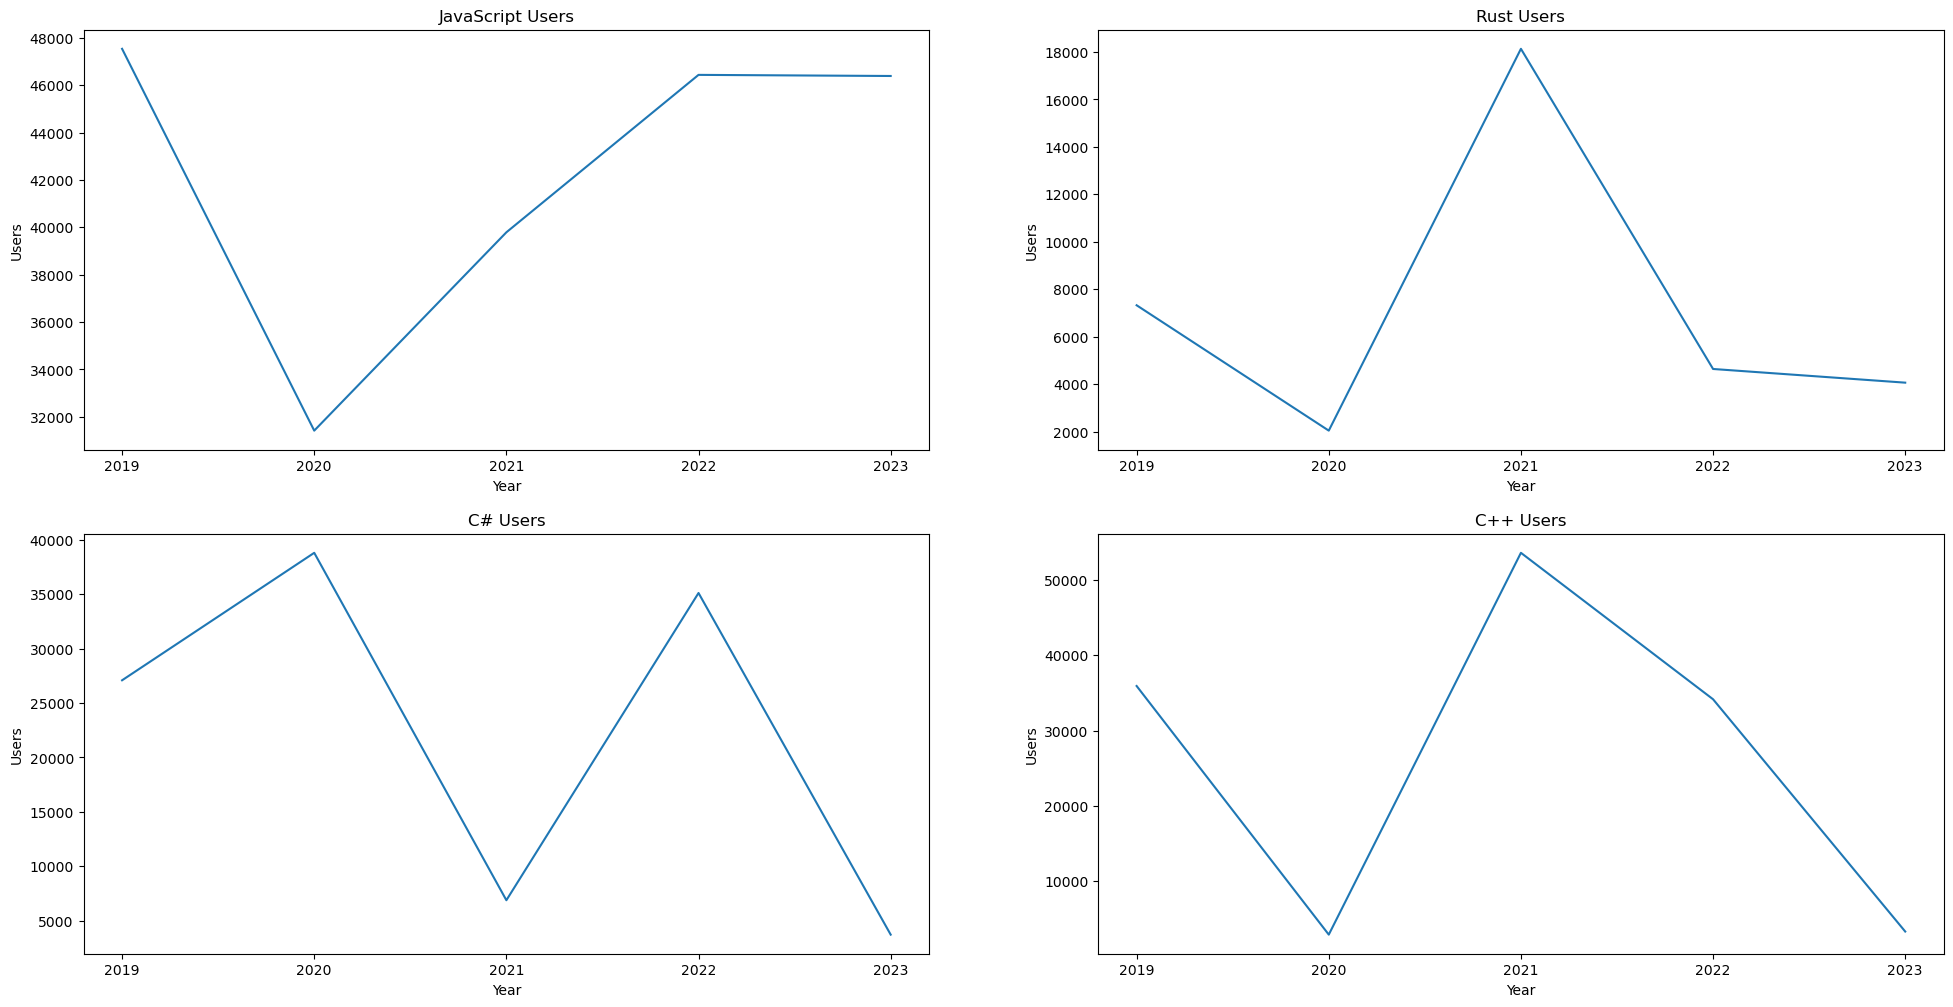

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(24, 12))
graph('JavaScript', axes[0, 0])
graph('Rust', axes[0, 1])
graph('C#', axes[1, 0])
graph('C++', axes[1, 1])
plt.show()